
### Rejection sampling
This notebook provides a simple example to understand how rejection sampling works.
Rejection sampling is closely related to importance sampling and facilitates sample generation.

Let $X$ be a random variable with probabilit $p$ so that

I=E[$f(X)$]=$\int{f(x)p(x)dx}$

If the integral cannot be evaluated, we define a proxy function $q(x)$ also known as sampling or proposal density to sample $f(x)p(x)$. Rejection sampling allows us to sample from our proxy density.

Given a density function $f(x)$, the rejection sampling generates samples from this function by using the following algorithm.


1. Select a number $M ≥ sup_{x}\frac{f(x)}{q(x)}$. Proposal density $q(x)$ can be a normal distribution.
2. Generate a random sample from proposal distribution $q(x)$ and another random sample from uniform distribution $Uni[0,M*q(x)]$.
3. Using the same sample $x$ evaluate $U <f (Y)$. If $M*q(x)$ is bounded by target function accept the sample. Repeat until you can identify an appropriate $x$ under $q(x)$.


**_NOTE_** please refer to your notes for a more in-depth explanation on importance sampling.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats

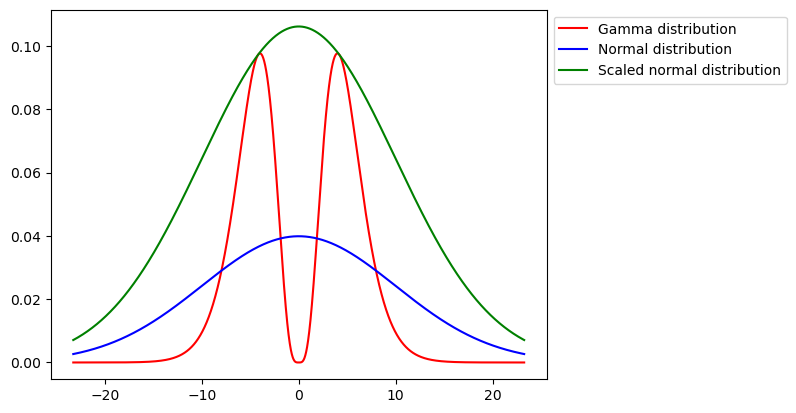

In [10]:
#Generate a double gamma distribution
gamma=stats.dgamma(a=5)
#Generate a normal sampling function
normal=stats.norm(loc=0,scale=10)

#Explore distributions
#generate samples
samples=np.linspace(min(gamma.ppf(0.01),normal.ppf(0.01)),max(gamma.ppf(0.99),normal.ppf(0.99)),10000)

gamma_samples=gamma.pdf(samples)
normal_samples=normal.pdf(samples)

#Find scaling factor
M=max(gamma_samples/normal_samples)
#Plot distirbutions
plt.plot(samples,gamma_samples,'-r',label='Gamma distribution')
plt.plot(samples,normal_samples,'-b',label='Normal distribution')
plt.plot(samples,M*normal_samples,'-g',label='Scaled normal distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [47]:
#Rejection sampling function

def rejection_sampling(sample_dist,target_dist,scaling):
    """
    Function performs rejection sampling by using sample and target distributions with a set scaling factor. Rejection sampling fucntion returns accepted samples and their PDF values.
    #Args
        sample_dist, func- sampling distribution fuction
        target_dist, func- target distribution fuction
        scaling, int,float - scaling factor
    #Returns
        sample, int,float - a sample value that was used to sample distribution
        pred_uniform, float - a uniform function generated distribution value
    """
    #NOTE keep True until you find an appropriate value
    #NOTE instead of looping you can use vectorized numpy sampling to speed up the search
    while True:
        #Sample from normal distribution
        sample=np.random.normal(0,10)
        pred=scaling*sample_dist.pdf(sample)
        pred_uniform=np.random.uniform(0,pred)
        actual_val=target_dist.pdf(sample)
        
        #If sample is not rejected return sample
        if pred_uniform<actual_val:
            return sample,pred_uniform

In [54]:
#Sample points for the target function
sample_values=[rejection_sampling(normal,gamma,M) for i in range(500)]

#Get sample and pdf values
s,p=zip(*sample_values)
s=pd.Series(s)
p=pd.Series(p)

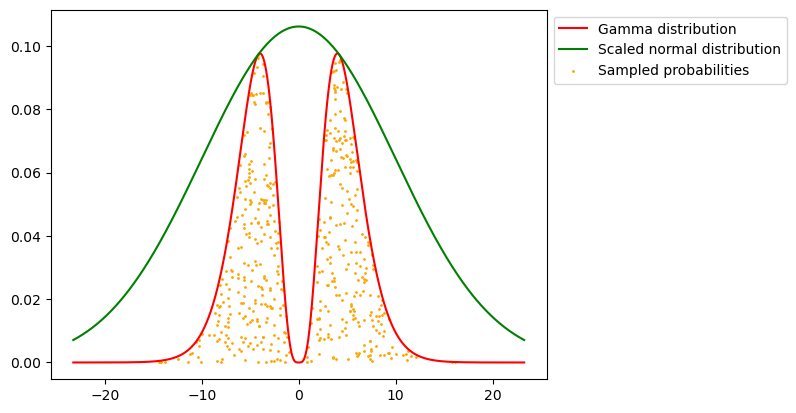

In [55]:
#Plot rejection sampling results
plt.plot(samples,gamma_samples,'-r',label='Gamma distribution')
plt.plot(samples,M*normal_samples,'-g',label='Scaled normal distribution')
plt.scatter(s,p,s=1,color="orange",label='Sampled probabilities')
plt.legend(bbox_to_anchor=(1,1),loc="upper left")
plt.show()

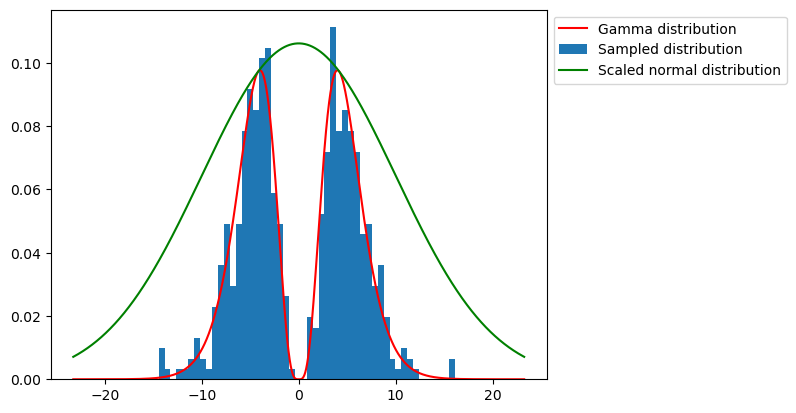

In [60]:
#Plot rejection sampling results without sampled PDFs
plt.plot(samples,gamma_samples,'-r',label='Gamma distribution')
plt.hist(s,density=True,bins=50,label='Sampled distribution') #normalised sample occurrance 
plt.plot(samples,M*normal_samples,'-g',label='Scaled normal distribution')
plt.legend(bbox_to_anchor=(1,1),loc="upper left")
plt.show()